In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
results_2006 = pd.read_csv('data/results_2006.csv')
results_2008 = pd.read_csv('data/results_2008.csv')
results_2010 = pd.read_csv('data/results_2010.csv')
results_2012 = pd.read_csv('data/results_2012.csv')
results_2014 = pd.read_csv('data/results_2014.csv')
results_2016 = pd.read_csv('data/results_2016.csv')

athletes_data = pd.read_excel('data/metadata.xlsx', sheet_name='athletes')
games_data = pd.read_excel('data/metadata.xlsx', sheet_name='games')

# Exercise 1

<div class="alert alert-block alert-success">


- Combine all provided data adequately into a single, tidy data set (e.g. by merging, concatenating
or reshaping the data) such that you are able to answer the subsequent questions.

- Explain your steps in a few sentences. How do you combine the data? What are the main
challenges? How do you deal with them and why in this way?
 
</div>

<div class="alert alert-info">
First, I make my initial observations of the dataset and realize:

- All results tables and the athletes_data table have clean structures, and the data is not ill-formatted.
- The games_data table requires brief row cleaning.

The main challenge at this stage is the presence of many NaN values. I will need to assess later how these missing values influence the analysis—whether I can ignore them or if I should implement a specific handling method. Additionally, not all columns adhere to the First Normal Form (1NF); for example, the value ranges of certain attributes are not always atomic (such as measurements, names, and affiliations).

This implies that the entries may need several transformations, including:
- Value splitting
- Changing data types

These transformations will be conducted after data merging, as the specific transformations needed will depend on the exercise.
</div>

In [3]:
# Display the first few rows of the tables as examples
results_2006.head()

,athlete_id,season,sport,event,position,medal,country,team
0,13139.0,Winter,Speed Skating,"3,000 metres, Women",9.0,NaN,Canada,NaN
1,13139.0,Winter,Speed Skating,"5,000 metres, Women",1.0,Gold,Canada,NaN
2,13139.0,Winter,Speed Skating,"Team Pursuit (6 laps), Women",2.0,Silver,Canada,Canada
3,65547.0,Winter,Bobsleigh,"Four, Men",25.0,NaN,Brazil,Brazil
4,71212.0,Winter,Bobsleigh,"Four, Men",24.0,NaN,Hungary,Hungary


In [4]:
athletes_data.head()

,athlete_id,name,sex,measurements,born,died,affiliations
0,7,Patrick•Chila,Male,180 cm / 73 kg,1969-11-27,NaN,Espérance de Reuilly / Levallois SCTT / Royal ...
1,15,Damien•Éloi,Male,165 cm / 58 kg,1969-07-04,NaN,"Caen TTC, Caen (FRA) / SAG Cestas, Cestas (FRA..."
2,27,Christophe•Legoût,Male,177 cm / 75 kg,1973-08-06,NaN,"Levallois SC, Levallois-Perret (FRA) / Istres ..."
3,132,Elke•Schall-Wosik,Female,180 cm / 68 kg,1973-07-19,NaN,TSG Dülmen / Bayer Uerdingen / SV Winterwerb /...
4,179,Kallinikos•Kreangka,Male,169 cm / 62 kg,1972-03-08,NaN,"Finower TTC, GER / TTF Liebherr Ochsenhausen E..."


In [5]:
games_data.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,year,season,city,country,opened,closed
3,1912,Summer,Stockholm,Sweden,1912-07-06,1912-07-27
4,1920,Summer,Antwerpen,Belgium,1920-08-14,1920-08-30


In [6]:
# Brief cleaning for the 'games_data' table

# Drop the first three rows
games_data = games_data.drop([0, 1, 2])

# Rename the columns accordingly
games_data.columns = [
    'year', 
    'season', 
    'O_city', 
    'O_country', 
    'opening_date', 
    'closing_date'
]

games_data = games_data.sort_values(by=['year'])

games_data = games_data.reset_index(drop=True)

games_data.head()

,year,season,O_city,O_country,opening_date,closing_date
0,1896,Summer,Athina,Greece,1896-04-06,1896-04-15
1,1900,Summer,Paris,France,NaN,NaN
2,1904,Summer,St. Louis,United States,1904-05-14,NaN
3,1908,Summer,London,Great Britain,1908-07-13,NaN
4,1912,Summer,Stockholm,Sweden,1912-07-06,1912-07-27


<div class="alert alert-info">
Then, I merge the tables together into one large table, referred to as df.
</div>

In [7]:
# Start by combining the results tables into one table 'results_all'
# And add a 'year' column with the respective year for each results table

results = [results_2006, results_2008, results_2010, results_2012, results_2014, results_2016]
years = ['2006', '2008', '2010', '2012', '2014', '2016']

for result, year in zip(results, years):
    result.insert(0, 'year', year)

results_all = pd.concat(results, axis = 0)

results_all.head()

,year,athlete_id,season,sport,event,position,medal,country,team
0,2006,13139.0,Winter,Speed Skating,"3,000 metres, Women",9.0,NaN,Canada,NaN
1,2006,13139.0,Winter,Speed Skating,"5,000 metres, Women",1.0,Gold,Canada,NaN
2,2006,13139.0,Winter,Speed Skating,"Team Pursuit (6 laps), Women",2.0,Silver,Canada,Canada
3,2006,65547.0,Winter,Bobsleigh,"Four, Men",25.0,NaN,Brazil,Brazil
4,2006,71212.0,Winter,Bobsleigh,"Four, Men",24.0,NaN,Hungary,Hungary


In [8]:
results_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54276 entries, 0 to 13745
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        54276 non-null  object 
 1   athlete_id  54276 non-null  float64
 2   season      54276 non-null  object 
 3   sport       54276 non-null  object 
 4   event       54276 non-null  object 
 5   position    45546 non-null  object 
 6   medal       7642 non-null   object 
 7   country     54276 non-null  object 
 8   team        20820 non-null  object 
dtypes: float64(1), object(8)
memory usage: 4.1+ MB


In [9]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   year          62 non-null     object
 1   season        62 non-null     object
 2   O_city        62 non-null     object
 3   O_country     62 non-null     object
 4   opening_date  51 non-null     object
 5   closing_date  49 non-null     object
dtypes: object(6)
memory usage: 3.0+ KB


In [10]:
# Change the data type of the 'year' column from object to int
# in both 'results_all' and 'games_data' tables 
# to ensure merging on 'year' works correctly
results_all['year'] = results_all['year'].astype(int)
games_data['year'] = games_data['year'].astype(int)

In [11]:
# Merging all tables together and renaming/dropping some columns accordingly
df = (
    results_all.merge(games_data, how='left', on='year')
    .merge(athletes_data, how='left', on='athlete_id')
    .rename(columns={
        'season_x': 'season',
        'country': 'athlete_country'
    })
    .drop(columns=['season_y'])
)
df.head()

,year,athlete_id,season,sport,event,position,medal,athlete_country,team,O_city,O_country,opening_date,closing_date,name,sex,measurements,born,died,affiliations
0,2006,13139.0,Winter,Speed Skating,"3,000 metres, Women",9.0,NaN,Canada,NaN,Torino,Italy,2006-02-10,2006-02-26,Clara•Hughes,Female,175 cm / 72 kg,1972-09-27,NaN,Manitoba / Saturn Racing Team / Sherbrooke Spe...
1,2006,13139.0,Winter,Speed Skating,"5,000 metres, Women",1.0,Gold,Canada,NaN,Torino,Italy,2006-02-10,2006-02-26,Clara•Hughes,Female,175 cm / 72 kg,1972-09-27,NaN,Manitoba / Saturn Racing Team / Sherbrooke Spe...
2,2006,13139.0,Winter,Speed Skating,"Team Pursuit (6 laps), Women",2.0,Silver,Canada,Canada,Torino,Italy,2006-02-10,2006-02-26,Clara•Hughes,Female,175 cm / 72 kg,1972-09-27,NaN,Manitoba / Saturn Racing Team / Sherbrooke Spe...
3,2006,65547.0,Winter,Bobsleigh,"Four, Men",25.0,NaN,Brazil,Brazil,Torino,Italy,2006-02-10,2006-02-26,Claudinei•da Silva,Male,186 cm / 88 kg,1970-11-19,NaN,Funilense/Reebok
4,2006,71212.0,Winter,Bobsleigh,"Four, Men",24.0,NaN,Hungary,Hungary,Torino,Italy,2006-02-10,2006-02-26,Zsolt•Kürtösi,Male,188 cm / 88 kg,1971-03-21,NaN,"TFSE, Budapest (HUN) / Pécsi VSK, Pécs (HUN)"


In [12]:
# Transform the 'name' column into 'first_name' and 'last_name' 
# for better processing in exercise 4
df[['first_name', 'last_name']] = df['name'].str.split('•', n=1, expand=True)

df.drop(columns=['name'], inplace=True)

df.head()

,year,athlete_id,season,sport,event,position,medal,athlete_country,team,O_city,O_country,opening_date,closing_date,sex,measurements,born,died,affiliations,first_name,last_name
0,2006,13139.0,Winter,Speed Skating,"3,000 metres, Women",9.0,NaN,Canada,NaN,Torino,Italy,2006-02-10,2006-02-26,Female,175 cm / 72 kg,1972-09-27,NaN,Manitoba / Saturn Racing Team / Sherbrooke Spe...,Clara,Hughes
1,2006,13139.0,Winter,Speed Skating,"5,000 metres, Women",1.0,Gold,Canada,NaN,Torino,Italy,2006-02-10,2006-02-26,Female,175 cm / 72 kg,1972-09-27,NaN,Manitoba / Saturn Racing Team / Sherbrooke Spe...,Clara,Hughes
2,2006,13139.0,Winter,Speed Skating,"Team Pursuit (6 laps), Women",2.0,Silver,Canada,Canada,Torino,Italy,2006-02-10,2006-02-26,Female,175 cm / 72 kg,1972-09-27,NaN,Manitoba / Saturn Racing Team / Sherbrooke Spe...,Clara,Hughes
3,2006,65547.0,Winter,Bobsleigh,"Four, Men",25.0,NaN,Brazil,Brazil,Torino,Italy,2006-02-10,2006-02-26,Male,186 cm / 88 kg,1970-11-19,NaN,Funilense/Reebok,Claudinei,da Silva
4,2006,71212.0,Winter,Bobsleigh,"Four, Men",24.0,NaN,Hungary,Hungary,Torino,Italy,2006-02-10,2006-02-26,Male,188 cm / 88 kg,1971-03-21,NaN,"TFSE, Budapest (HUN) / Pécsi VSK, Pécs (HUN)",Zsolt,Kürtösi


In [13]:
# Reorder the columns for better visibility
df = df[
    [
        'year', 
        'season', 
        'O_city', 
        'O_country', 
        'opening_date', 
        'closing_date', 
        'sport', 
        'event', 
        'position', 
        'medal',
        'athlete_id', 
        'first_name', 
        'last_name', 
        'athlete_country', 
        'team', 
        'sex', 
        'measurements', 
        'born', 
        'died', 
        'affiliations'
    ]
]

df.head()

,year,season,O_city,O_country,opening_date,closing_date,sport,event,position,medal,athlete_id,first_name,last_name,athlete_country,team,sex,measurements,born,died,affiliations
0,2006,Winter,Torino,Italy,2006-02-10,2006-02-26,Speed Skating,"3,000 metres, Women",9.0,NaN,13139.0,Clara,Hughes,Canada,NaN,Female,175 cm / 72 kg,1972-09-27,NaN,Manitoba / Saturn Racing Team / Sherbrooke Spe...
1,2006,Winter,Torino,Italy,2006-02-10,2006-02-26,Speed Skating,"5,000 metres, Women",1.0,Gold,13139.0,Clara,Hughes,Canada,NaN,Female,175 cm / 72 kg,1972-09-27,NaN,Manitoba / Saturn Racing Team / Sherbrooke Spe...
2,2006,Winter,Torino,Italy,2006-02-10,2006-02-26,Speed Skating,"Team Pursuit (6 laps), Women",2.0,Silver,13139.0,Clara,Hughes,Canada,Canada,Female,175 cm / 72 kg,1972-09-27,NaN,Manitoba / Saturn Racing Team / Sherbrooke Spe...
3,2006,Winter,Torino,Italy,2006-02-10,2006-02-26,Bobsleigh,"Four, Men",25.0,NaN,65547.0,Claudinei,da Silva,Brazil,Brazil,Male,186 cm / 88 kg,1970-11-19,NaN,Funilense/Reebok
4,2006,Winter,Torino,Italy,2006-02-10,2006-02-26,Bobsleigh,"Four, Men",24.0,NaN,71212.0,Zsolt,Kürtösi,Hungary,Hungary,Male,188 cm / 88 kg,1971-03-21,NaN,"TFSE, Budapest (HUN) / Pécsi VSK, Pécs (HUN)"


<div class="alert alert-block alert-success">
Sort the data permanently by year, sport, event and position. Then display the first 3 rows and
 the last 3 rows of the data set and print the number of rows and columns.
</div>

In [14]:
df = df.sort_values(by=['year', 'sport', 'event', 'position'])
df.reset_index(drop=True, inplace=True)

In [15]:
# Display the first 3 rows
df.head(3)

,year,season,O_city,O_country,opening_date,closing_date,sport,event,position,medal,athlete_id,first_name,last_name,athlete_country,team,sex,measurements,born,died,affiliations
0,2006,Winter,Torino,Italy,2006-02-10,2006-02-26,Alpine Skiing,"Combined, Men",1.0,Gold,110095.0,Ted,Ligety,United States,NaN,Male,180 cm / 86 kg,1984-08-31,NaN,"Park City Ski Team, Park City (USA)"
1,2006,Winter,Torino,Italy,2006-02-10,2006-02-26,Alpine Skiing,"Combined, Men",2.0,Silver,101791.0,Ivica,Kostelić,Croatia,NaN,Male,182 cm / 88 kg,1979-11-23,NaN,"SK Zagreb, Zagreb (CRO)"
2,2006,Winter,Torino,Italy,2006-02-10,2006-02-26,Alpine Skiing,"Combined, Men",3.0,Bronze,101752.0,Rainer,Schönfelder,Austria,NaN,Male,176 cm / 88 kg,1977-06-13,NaN,"SC Petzen, Bleiburg (AUT)"


In [16]:
# Display the last 3 rows
df.tail(3)

,year,season,O_city,O_country,opening_date,closing_date,sport,event,position,medal,athlete_id,first_name,last_name,athlete_country,team,sex,measurements,born,died,affiliations
54273,2016,Summer,Rio de Janeiro,Brazil,2016-08-05,2016-08-21,Wrestling,"Welterweight, Greco-Roman, Men",16.0,NaN,117165.0,Tamás,Lőrincz,Hungary,NaN,Male,172 cm / 75 kg,1986-12-20,NaN,Ceglédi VSE
54274,2016,Summer,Rio de Janeiro,Brazil,2016-08-05,2016-08-21,Wrestling,"Welterweight, Greco-Roman, Men",17.0,NaN,134915.0,Ruslan,Tsarev,Kyrgyzstan,NaN,Male,170 cm / 66 kg,1991-07-16,NaN,"Berkut [Bishkek, KGZ]"
54275,2016,Summer,Rio de Janeiro,Brazil,2016-08-05,2016-08-21,Wrestling,"Welterweight, Greco-Roman, Men",18.0,NaN,133610.0,Adham,Saleh,Egypt,NaN,Male,160 cm / 66 kg,1993-06-27,NaN,NaN


In [17]:
print(f"Number of rows: {df.shape[0]}\n"
      f"Number of columns: {df.shape[1]}")

Number of rows: 54276
Number of columns: 20


# Exercise 2

<div class="alert alert-block alert-success">
Which woman won the Gold medal in the 100 meters race of the 2012 olympic games?
</div>

In [18]:
result_2_1 = df[
    (df['event'] == '100 metres, Women') & 
    (df['year'] == 2012) & 
    (df['medal'] == 'Gold')
][['first_name', 'last_name']]

In [19]:
print(result_2_1.iloc[0,0], result_2_1.iloc[0,1], 
      'is the woman who won the Gold medal in the 100 meters race of the 2012 olympic games.')

Shelly-Ann Fraser-Pryce is the woman who won the Gold medal in the 100 meters race of the 2012 olympic games.


<div class="alert alert-block alert-success">
 Which athlete has won the most gold medals, considering only athletes from the following countries:
 “Jamaica”, “Trinidad and Tobago”, “Barbados”, “Grenada”, “Saint Kitts and Nevis”?
</div>

In [20]:
result_2_2 = (
    df[
        (df['athlete_country'].isin([
            'Jamaica', 
            'Trinidad and Tobago', 
            'Barbados', 
            'Grenada', 
            'Saint Kitts and Nevis'
        ])) & 
        (df['medal'] == 'Gold')
    ]
    .groupby('athlete_id')
    .size()
    .nlargest(1)
)

# Retrieve the name of the athlete with the most Gold medals
athlete_name_2_2 = ' '.join(df.loc[df['athlete_id'] == result_2_2.index[0], ['first_name', 'last_name']].values[0])

# Retrieve the country of the athlete with the most Gold medals
athlete_country_2_2 = df.loc[df['athlete_id'] == result_2_2.index[0], ['athlete_country']].values[0]

In [21]:
print(athlete_name_2_2, 'from', athlete_country_2_2[0], 'has won the most gold medals,',result_2_2.iloc[0],'in total, when considering only athletes from the following countries: “Jamaica”, “Trinidad and Tobago”, “Barbados”, “Grenada”, “Saint Kitts and Nevis”')

Usain Bolt from Jamaica has won the most gold medals, 8 in total, when considering only athletes from the following countries: “Jamaica”, “Trinidad and Tobago”, “Barbados”, “Grenada”, “Saint Kitts and Nevis”


<div class="alert alert-block alert-success">
What was the best position, worst position, and average position achieved by athletes from “Nepal”?
 (Hint: you can ignore missing values in the position column)
</div>

In [22]:
# Convert the 'position' column to numeric
df['position'] = pd.to_numeric(df['position'], errors='coerce')

# Calculate the best, worst and average position achieved by athletes from Nepal
best_position = df[df['athlete_country'] == 'Nepal']['position'].dropna().min()
worst_position = df[df['athlete_country'] == 'Nepal']['position'].dropna().max()
average_position = round(df[df['athlete_country'] == 'Nepal']['position'].dropna().mean(), 1)

print('The best position, worst position, and average position achieved by athletes from “Nepal” are ' + 
      str(best_position) + ', ' + 
      str(worst_position) + ' and ' + 
      str(average_position))

The best position, worst position, and average position achieved by athletes from “Nepal” are 7.0, 94.0 and 47.8


# Exercise 3

<div class="alert alert-block alert-success">
Visualize how the number of participants has changed over the years. Create a single figure with one
 subplot for the summer games and one subplot for the winter games.
</div>

In [23]:
# Ensure that athletes who participated in multiple events are counted only once
result_3 = df.groupby(['year','athlete_id',]).first().reset_index()

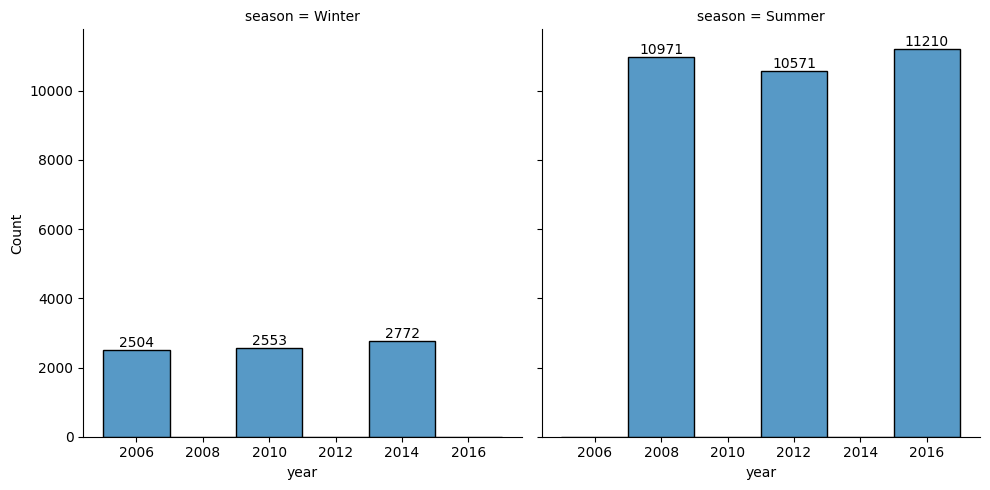

In [24]:
# Convert the 'year' column to string for proper categorization in the displot
result_3['year'] = result_3['year'].astype(str)

# Create the displot with histograms, separated by season
g = sns.displot(data=result_3, x='year', col='season', kind='hist')

# Add counts on top of the bars
for ax in g.axes.flat:
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            x = p.get_x() + p.get_width() / 2
            ax.annotate(f'{int(height)}', (x, height), ha='center', va='bottom')

plt.show()

<div class="alert alert-info">
- In this exercise, I attempted to match the official number of participants from official sources, but I found inconsistencies in the statistics. Several results from the Internet do not align, which raises questions about whether the generated results from Project 1 are inaccurate or if the differences are due to varying reporting methods.

- Table 1: Different statistics for the number of participants:

| year | Olympedia.org | Wikipedia | Olympics.com | Project 1's results|
|------|---------------|-----------|--------------|--------------------|
| 2006 | 2494          | 2494      | 2508         | 2504               |
| 2008 | 10899         | 10899     | 10942        | 10971              |
| 2010 | 2536          | 2626      | 2566         | 2553               |
| 2012 | 10518         | 10518     | 10568        | 10571              |
| 2014 | 2747          | 2873      | 2780         | 2772               |
| 2016 | 11180         | 11180     | 11238        | 11210              |

</div>

# Exercise 4

<div class="alert alert-block alert-success">
 Which last name is the most common among the athletes of the 2016 olympic games, and how often does
 this name occur?
</div>

In [25]:
# Ensure that athletes whose names appear multiple times due to participation in multiple events within the same Olympic year are counted only once
result_4 = df.groupby(['year','athlete_id',]).first().reset_index()

In [26]:
# Filter for the year 2016 and count the occurrences of last names
result_4 = result_4[result_4['year'] == 2016]['last_name'].value_counts().nlargest(1)

print(result_4.index[0],'is the most common last name among the athletes of the 2016 olympic games, with', result_4.iloc[0],'athletes having this last name.')

López is the most common last name among the athletes of the 2016 olympic games, with 29 athletes having this last name.


# Exercise 5

<div class="alert alert-block alert-success">
Which are the 5 sports with the highest average age of gold medal winners? Provide the sport and the average age.

Note: We define age as the number of years between the athlete’s birth and the opening date of the olympic games
</div>

In [27]:
# Transform the 'born' and 'opening_date' columns to datetime
df['born'] = pd.to_datetime(df['born'])
df['opening_date'] = pd.to_datetime(df['opening_date'])

# Calculate the ages of each athlete at the time of the Olympic Games
df['age_at_olympics'] = (df['opening_date'] - df['born']).dt.days // 365

In [28]:
# Calculate the mean ages and present the 5 sports with the highest average age of gold medal winners
result_5 = (
    df[df['medal'] == 'Gold']
    .groupby('sport')['age_at_olympics']
    .mean()
    .nlargest(5)
    .reset_index()
)

result_5.columns = ['sport', 'mean_age_at_olympics']

result_5

,sport,mean_age_at_olympics
0,Equestrian Jumping,42.300000
1,Equestrian Eventing,35.454545
2,Cycling Road,33.500000
3,Equestrian Dressage,33.444444
4,Curling,32.923077


# Exercise 6

<div class="alert alert-block alert-success">
Calculate the medal table for the olympic games 2016. See the official medal table as a reference. Your
 medal table should have the same structure (same column names and same sorting) as the official medal
 table. Display the top 10 countries.
</div>

In [29]:
# Filter the DataFrame for the year 2016 and select only the rows with medals
medal_counts = df[(df['year'] == 2016) & 
                  (df['medal'].isin(['Gold', 'Silver', 'Bronze']))]

In [30]:
# Drop duplicated medals where multiple people participated as a team
medal_counts = (
    medal_counts
    .groupby(['sport', 'event', 'medal', 'athlete_country'])
    .first()
    .reset_index()
)

In [31]:
# Count the medals ('Gold', 'Silver', 'Bronze') per country
medal_counts = (
    medal_counts
    .groupby('athlete_country')['medal']
    .value_counts()
    .reset_index(name='count')
)

# Fill any NaN values with 0 (if needed)
medal_counts = medal_counts.fillna(0)

medal_counts.head()

,athlete_country,medal,count
0,Algeria,Silver,2
1,Argentina,Gold,3
2,Argentina,Silver,1
3,Armenia,Silver,3
4,Armenia,Gold,1


In [32]:
# Pivot the 'medal_counts' table
medal_counts = medal_counts.pivot_table(
    index='athlete_country', 
    columns='medal', 
    values='count', 
    aggfunc='sum', 
    fill_value=0
)

# Calculate total medals for each country
medal_counts['Total'] = medal_counts.sum(axis=1)

# Reset index to convert country back to a column
medal_counts.reset_index(inplace=True)

# Sort by total medals in descending order
medal_counts.sort_values(
    by=['Gold', 'Silver', 'Bronze', 'Total'], 
    ascending=False, 
    inplace=True
)

In [33]:
# Assign ranks to countries based on total medals
medal_counts['Rank'] = range(1, len(medal_counts) + 1)

# Reorder columns
medal_counts = medal_counts[['Rank', 'athlete_country', 'Gold', 'Silver', 'Bronze', 'Total']]

# Rename country column to NOC
medal_counts.rename(columns={'athlete_country': 'NOC'}, inplace=True)

# Create a new DataFrame with specified columns and set 'Rank' as the index
result_6 = pd.DataFrame(medal_counts, columns=['Rank', 'NOC', 'Gold', 'Silver', 'Bronze', 'Total']).set_index('Rank')

result_6.head(10)

,NOC,Gold,Silver,Bronze,Total
Rank,,,,,
1,United States,46,37,38,121
2,Great Britain,27,23,17,67
3,People's Republic of China,26,18,26,70
4,Russian Federation,19,17,20,56
5,Germany,17,10,15,42
6,Japan,12,8,21,41
7,France,10,18,14,42
8,Republic of Korea,9,3,9,21
9,Italy,8,12,8,28
